# HeterogeneousMap

FLORIS provides a HeterogeneousMap object to enable a heterogeneity in the background wind speed. This notebook demonstrates how to use the HeterogeneousMap object in FLORIS.

Note that more detailed examples are provided within the examples_heterogeneous folder

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from floris import (
    FlorisModel,
    HeterogeneousMap,
    TimeSeries,
)
from floris.flow_visualization import visualize_heterogeneous_cut_plane

## Initialization

The HeterogeneousMap defines the heterogeneity in the background wind speed. For a set of x,y coordinates, a speed up (or low down), relative to the inflow wind speed, can be defined. This can vary according to the inflow wind speed and wind direction.  For wind directions and wind speeds not directly defined with the HeterogeneousMap, the nearest defined value is used.

In [3]:
# Define a map in which there is ab observed speed up for wind from the east (90 degrees)
# but not from the west (270 degrees)
heterogeneous_map = HeterogeneousMap(
    x=np.array([0.0, 0.0, 250.0, 500.0, 500.0]),
    y=np.array([0.0, 500.0, 250.0, 0.0, 500.0]),
    speed_multipliers=np.array(
        [
            [1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0],
            [1.5, 1.0, 1.25, 1.5, 1.0],
            [1.0, 1.5, 1.25, 1.0, 1.5],
        ]
    ),
    wind_directions=np.array([270.0, 270.0, 90.0, 90.0]),
    wind_speeds=np.array([5.0, 10.0, 5.0, 10.0]),
)

## Visualization

HeterogeneousMap includes methods to visualize the speed up for a given wind speed and wind direction. Note that in FLORIS, heterogeneity in the ambient flow only exists for points within the convex hull surrounding the defined points.  This boundary is illustrated in the flow.  All points outside the boundary are assume to be 1.0 * the inflow wind speed.

Text(0.5, 0.98, 'Heterogeneous speedup map for several directions and wind speeds')

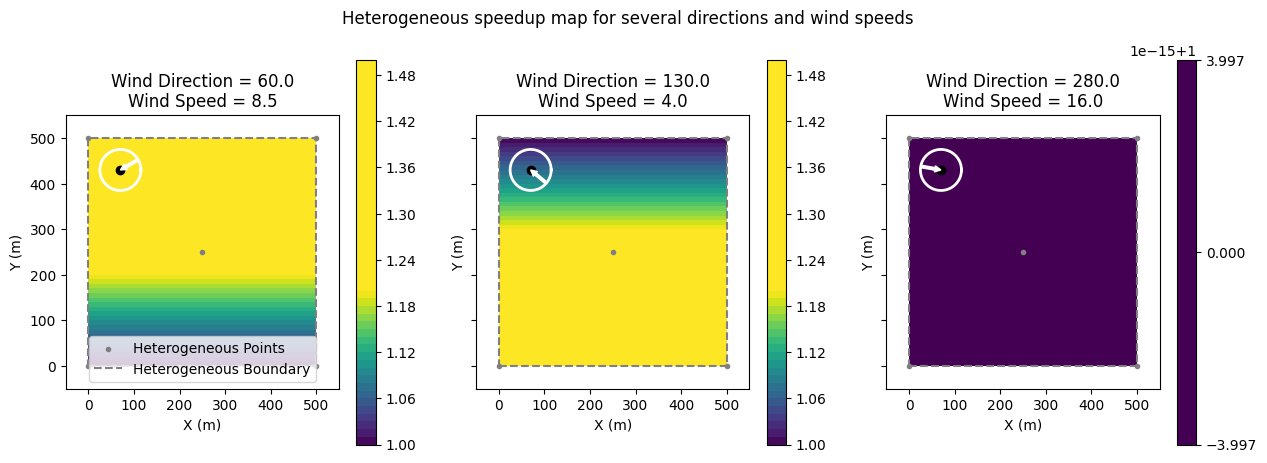

In [9]:
# Use the HeterogeneousMap object to plot the speedup map for 3 wd/ws combinations
fig, axarr = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))


ax = axarr[0]
heterogeneous_map.plot_single_speed_multiplier(
    wind_direction=60.0, wind_speed=8.5, ax=ax, vmin=1.0, vmax=1.2
)
ax.set_title("Wind Direction = 60.0\nWind Speed = 8.5")
ax.legend()

ax = axarr[1]
heterogeneous_map.plot_single_speed_multiplier(
    wind_direction=130.0, wind_speed=4.0, ax=ax, vmin=1.0, vmax=1.2
)
ax.set_title("Wind Direction = 130.0\nWind Speed = 4.0")

ax = axarr[2]
heterogeneous_map.plot_single_speed_multiplier(
    wind_direction=280.0, wind_speed=16.0, ax=ax, vmin=1.0, vmax=1.2
)
ax.set_title("Wind Direction = 280.0\nWind Speed = 16.0")
fig.suptitle("Heterogeneous speedup map for several directions and wind speeds")

## Applying heterogeneity to a FlorisModel

Applying the HeterogeneousMap to a FlorisModel is done by passing the HeterogeneousMap to a WindData object which is used to set the FlorisModel.  The WindData object constructs the appropriate speed up map for each wind direction and wind speed condition.

floris.floris_model.FlorisModel WARNING Deleting stored wind_data information.
floris.logging_manager.LoggingManager WARNING The calculated flow field contains points outside of the the user-defined heterogeneous inflow bounds. For these points, the interpolated value has been filled with the freestream wind speed. If this is not the desired behavior, the user will need to expand the heterogeneous inflow bounds to fully cover the calculated flow field area.
floris.floris_model.FlorisModel WARNING Deleting stored wind_data information.
floris.logging_manager.LoggingManager WARNING The calculated flow field contains points outside of the the user-defined heterogeneous inflow bounds. For these points, the interpolated value has been filled with the freestream wind speed. If this is not the desired behavior, the user will need to expand the heterogeneous inflow bounds to fully cover the calculated flow field area.
floris.floris_model.FlorisModel WARNING Deleting stored wind_data informatio

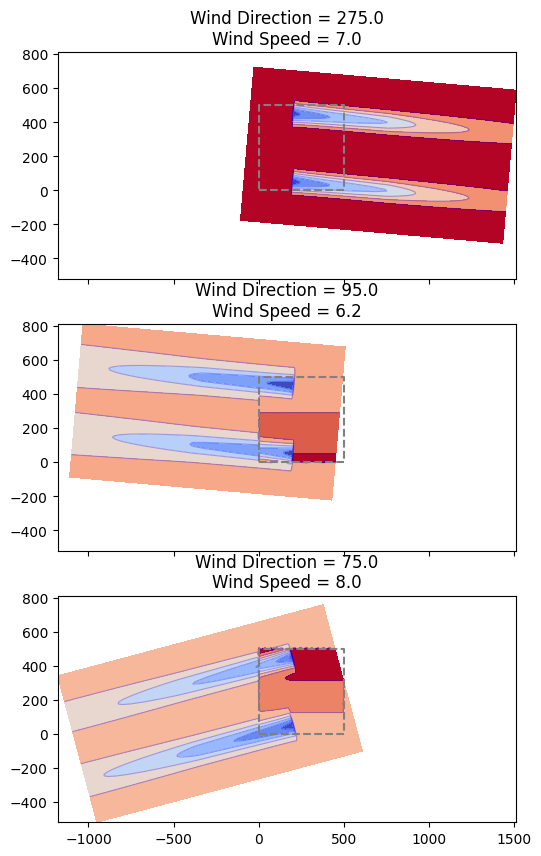

In [8]:
# Initialize FlorisModel
fmodel = FlorisModel("gch.yaml")

# Change the layout to a 2 turbine layout within the heterogeneous domain
fmodel.set(layout_x=[200, 200.0], layout_y=[50, 450.0])

# Define a TimeSeries object with 3 wind directions and wind speeds
# and turbulence intensity and using the above HeterogeneousMap object
time_series = TimeSeries(
    wind_directions=np.array([275.0, 95.0, 75.0]),
    wind_speeds=np.array([7.0, 6.2, 8.0]),
    turbulence_intensities=0.06,
    heterogeneous_map=heterogeneous_map,
)

# Apply the time series to the FlorisModel
fmodel.set(wind_data=time_series)

# Run the FLORIS simulation
fmodel.run()

# Visualize each of the findices
fig, axarr = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10, 10))

for findex in range(3):
    ax = axarr[findex]

    horizontal_plane = fmodel.calculate_horizontal_plane(
        x_resolution=200, y_resolution=100, height=90.0, findex_for_viz=findex
    )

    visualize_heterogeneous_cut_plane(
        cut_plane=horizontal_plane,
        fmodel=fmodel,
        ax=ax,
        title=(
            f"Wind Direction = {time_series.wind_directions[findex]}\n"
            f"Wind Speed = {time_series.wind_speeds[findex]}"
        ),
    )
